In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
penguins = pd.read_csv('penguins_size.csv')

In [18]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [19]:
penguins.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [20]:
penguins.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [21]:
penguins['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [22]:
penguins['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [23]:
penguins[penguins['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


There is one value that value in sex that is recorded as '.', removing this value ensures that the only values in sex are male or female.

In [24]:
penguins = penguins[penguins['sex'] != '.']
penguins['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [25]:
penguins.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [26]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [27]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [28]:
penguins[penguins['culmen_length_mm'].isna()].head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


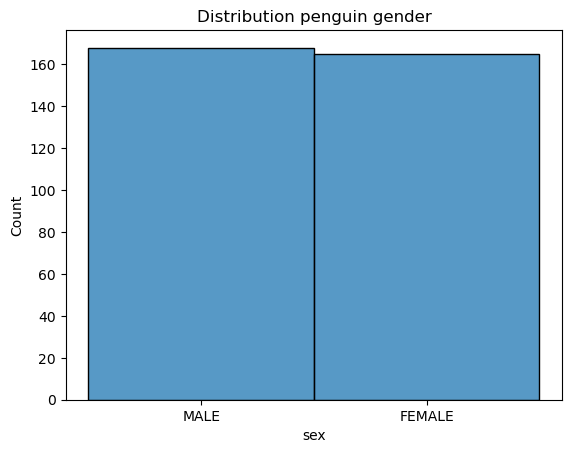

In [45]:
sns.histplot(penguins['sex'])
plt.title('Distribution penguin gender')
plt.show()

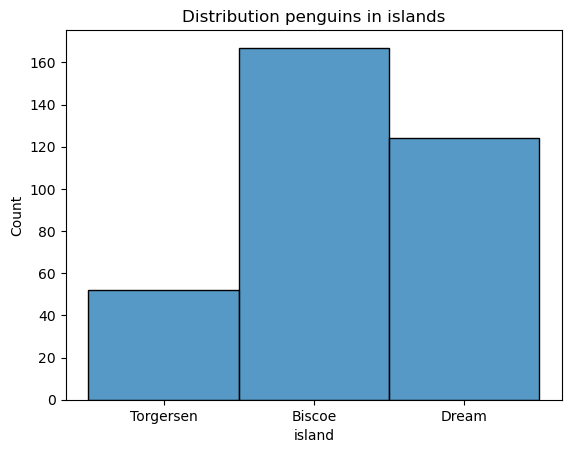

In [30]:
sns.histplot(penguins['island'])
plt.title('Distribution penguins in islands')
plt.show()

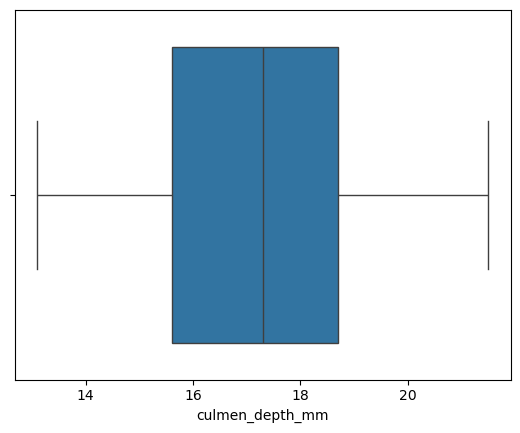

In [31]:
sns.boxplot(x = 'culmen_depth_mm', data = penguins)
plt.xlabel('culmen_depth_mm')
plt.show()

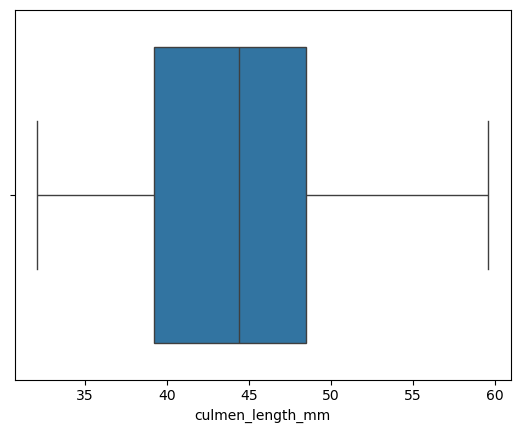

In [32]:
sns.boxplot(x = 'culmen_length_mm', data = penguins)
plt.xlabel('culmen_length_mm')
plt.show()

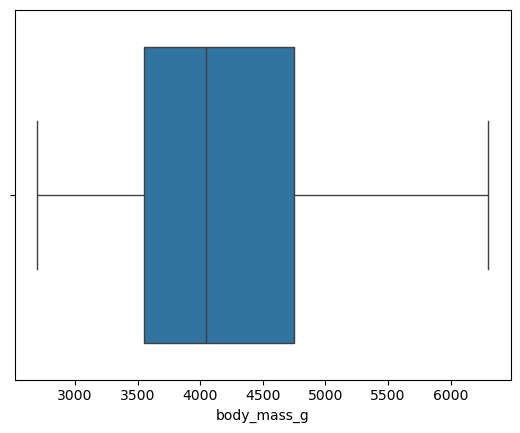

In [33]:
sns.boxplot(x = 'body_mass_g', data = penguins)
plt.xlabel('body_mass_g')
plt.show()

## Differences between genders

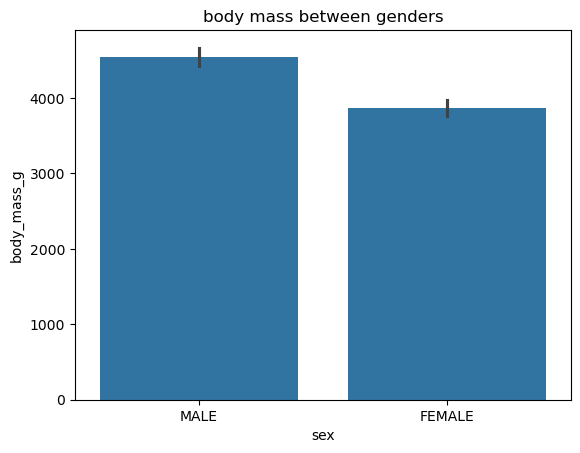

In [47]:
sns.barplot(x = 'sex', y = 'body_mass_g', data = penguins)
plt.title('body mass between genders')
plt.show()

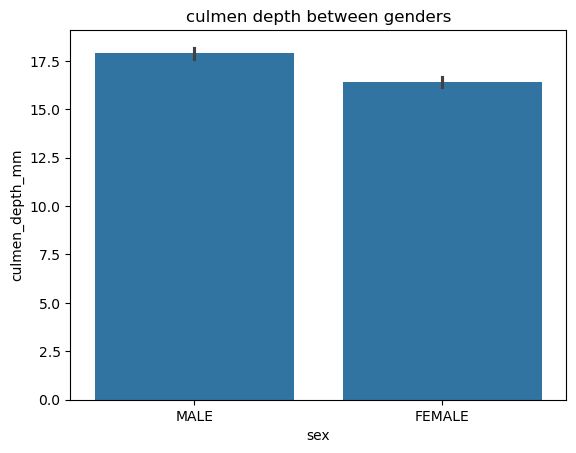

In [35]:
sns.barplot(x = 'sex', y = 'culmen_depth_mm', data = penguins)
plt.title('culmen depth between genders')
plt.show()

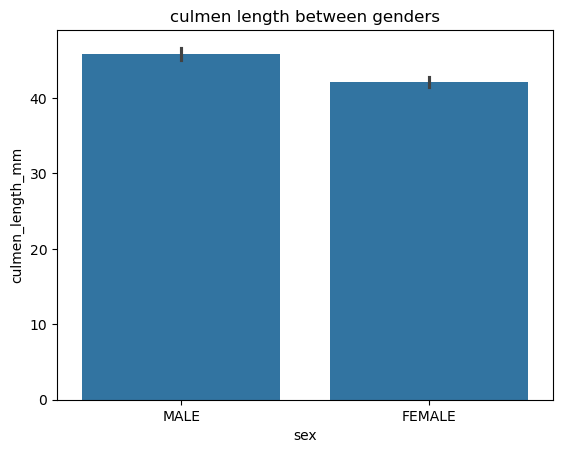

In [36]:
sns.barplot(x = 'sex', y = 'culmen_length_mm', data = penguins)
plt.title('culmen length between genders')
plt.show()

### Findings
> Between the genders, male penguins have bigger culmens and weigh heavier than female penguins.

## Differences between islands

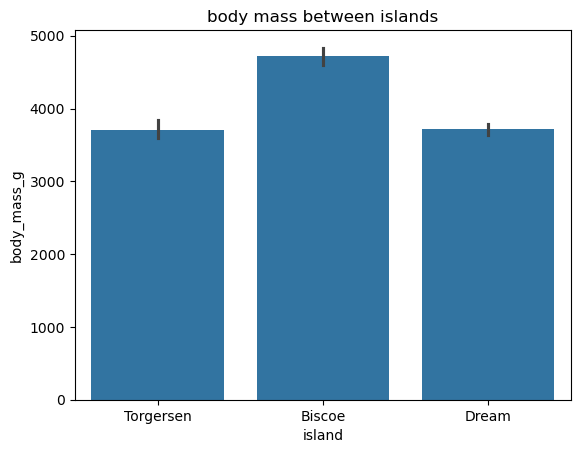

In [37]:
sns.barplot(x = 'island', y = 'body_mass_g', data = penguins)
plt.title('body mass between islands')
plt.show()

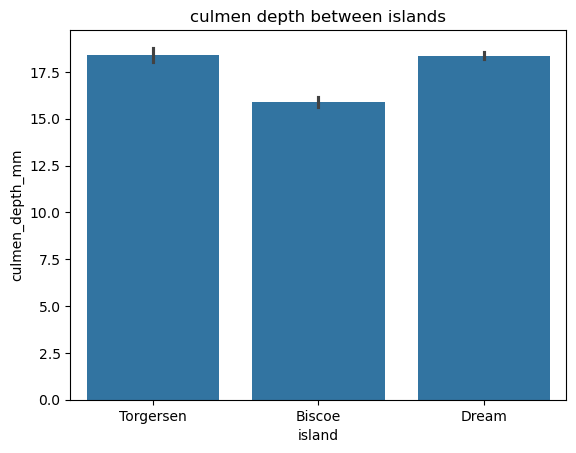

In [38]:
sns.barplot(x = 'island', y = 'culmen_depth_mm', data = penguins)
plt.title('culmen depth between islands')
plt.show()

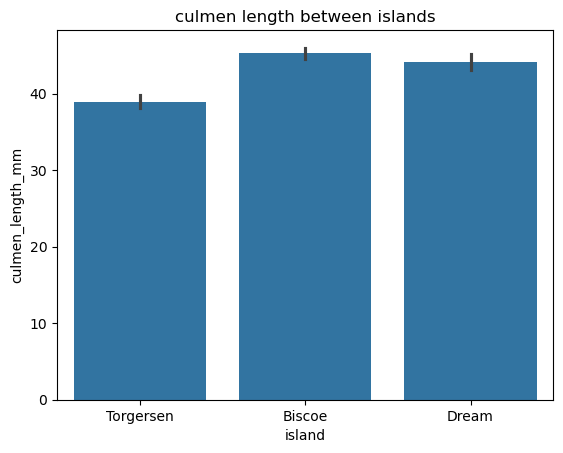

In [39]:
sns.barplot(x = 'island', y = 'culmen_length_mm', data = penguins)
plt.title('culmen length between islands')
plt.show()

### Findings
> Biscoe island penguins are the heaviest but have shorter culmen depth. Dream and Torgersen penguins are lighter but have taller depths.

## Differences between species

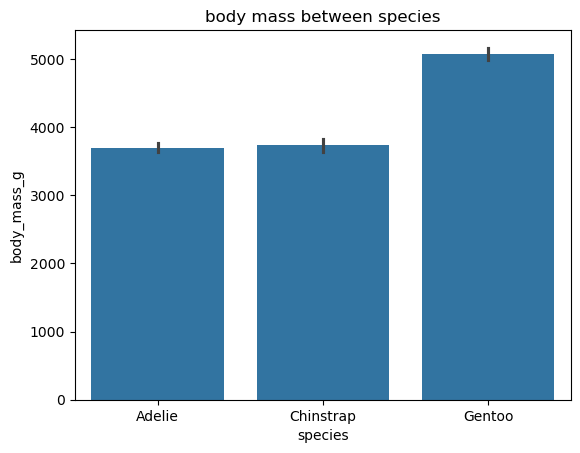

In [40]:
sns.barplot(x = 'species', y = 'body_mass_g', data = penguins)
plt.title('body mass between species')
plt.show()

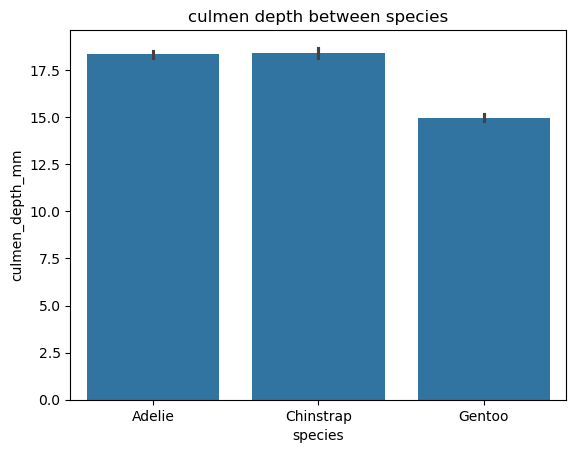

In [41]:
sns.barplot(x = 'species', y = 'culmen_depth_mm', data = penguins)
plt.title('culmen depth between species')
plt.show()

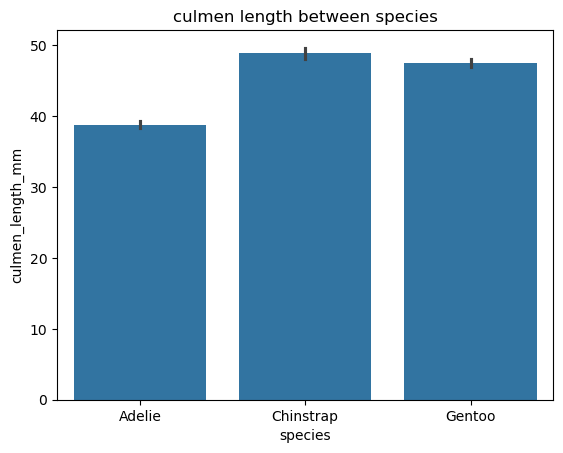

In [42]:
sns.barplot(x = 'species', y = 'culmen_length_mm', data = penguins)
plt.title('culmen length between species')
plt.show()

### Findings
> Gentoo penguins are significantly heavier than the other species, fall behind the other speicies in terms of culmen depth. Adelie penguins are similar to chinstrap pengiuns with the main difference between that chinstrap penguins have longer culmens length wise.